## Neural network training

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Mean Squared Error

In [2]:
def mean_squared_error(pred, target):
    # input type: ndarray
    return 0.5*np.sum((pred - target)**2)

In [3]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

## Cross Entropy Error

In [4]:
def cross_entropy1(pred, target):
    # input type: ndarray
    delta = 1e-7
    return -np.sum(target*np.log(pred + delta))

In [5]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy1(np.array(y), np.array(t))

0.510825457099338

In [6]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy1(np.array(y), np.array(t))

2.302584092994546

## Mini-batch Cross Entropy Error

In [7]:
def cross_entropy2(pred, target):
    '''
    input type: ndarray
    target: one-hot representation
    '''
    if pred.ndim == 1:
        pred = pred.view(1, pred.size)
        target = target.view(1, target.size)
    
    batch_size = pred.shape[0]
    delta = 1e-7
    return -np.sum(target*np.log(pred + delta)) / batch_size

In [8]:
t = [[0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]]

y = [[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],
    [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]]

cross_entropy2(np.array(y), np.array(t))

0.510825457099338

In [9]:
def cross_entropy3(pred, target):
    '''
    input type: ndarray
    target: label
    '''
    if pred.ndim == 1:
        pred = pred.view(1, pred.size)
        target = target.view(1, target.size)
    
    batch_size = pred.shape[0]
    delta = 1e-7
    return -np.sum(np.log(pred[np.arange(batch_size), target] + delta)) / batch_size

In [10]:
t = [2, 7]

y = [[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],
    [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]]

cross_entropy3(np.array(y), np.array(t))

0.510825457099338

## numerical differentiation

In [11]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

In [12]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

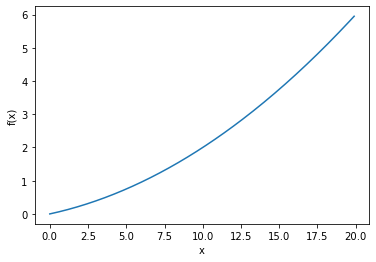

In [13]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) # 以 0.1 为单位，从 0 到 20 的数组 x
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)

In [14]:
numerical_diff(function_1, 5)

0.1999999999990898

In [15]:
def function_2(x):
    return np.sum(x**2)

In [16]:
def numerical_gradient(f, x):

    h = 1e-4 # 0.0001
    
    grad = np.zeros_like(x) # 生成和 x 形状相同的数组
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 的计算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 的计算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 还原值

    return grad

In [17]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [22]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

In [25]:
init_x = np.array([-3.0, 4.0])

x, x_history = gradient_descent(function_2, init_x, lr=0.1, step_num=100)

Text(0, 0.5, 'X1')

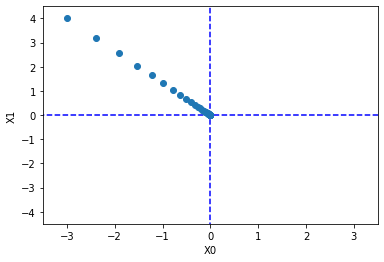

In [26]:
    plt.plot( [-5, 5], [0,0], '--b')
    plt.plot( [0,0], [-5, 5], '--b')
    plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")

## Compute gradient w.r.t weights

In [32]:
# import sys, os
# sys.path.append(os.pardir)
# from common.functions import softmax, cross_entropy_error
# from common.gradient import numerical_gradient

In [33]:
class simpleNet:
    
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [36]:
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.34882438  0.15128524 -0.50010962]
 [ 0.52323657  0.22692787 -0.75016443]]


## Update weights by SGD

In [38]:
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        
        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x: 输入数据 , t: 监督数据
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x: 输入数据 , t: 监督数据
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads